# Distribuciones en forma de anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)#numero aleatorios que seran el angulo
    distance = rnd.uniform(r_min, r_max, n_samples)#distancia uniforme
    data = []
    
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])#en coordenadas polares añadimos una tupla
    return np.array(data)

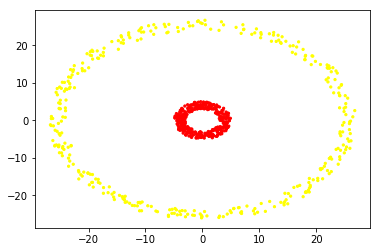

In [3]:
data1 = ring(3, 5)#anillo del centro radio de 3 a 5
data2 = ring(24, 27)#anillo externo radio de 24 a 27

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

Esta distribucion ha sido generada para parecer un anillo. Ahora intentaremos encontrar una distribucion aceptable con KMeans

## Algoritmo con Kmeans

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(2).fit(data) #definimos dos clusters y predecimos directamente desde los datos

In [8]:
clust = km.predict(data)

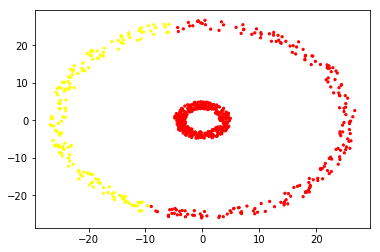

In [10]:
plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn")#s= tamaño de los puntos

## Algoritmo de los K Medoides